<IPython.core.display.Javascript object>


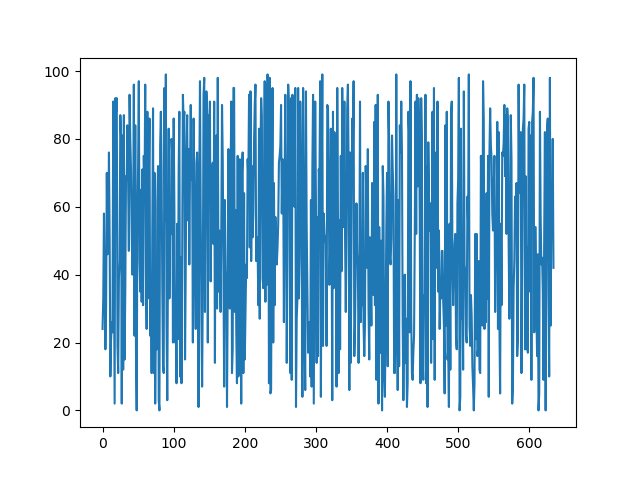

<matplotlib.backends.backend_nbagg.FigureCanvasNbAgg object at 0x0000028F7645EA48> 9


In [5]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time

class LiveGraph:
    # This class is based on code from:
    # https://stackoverflow.com/a/53952210
    
    def __init__(self, update_interval_ms = 100):
        self.x_data = []
        self.y_data = []
        
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, interval=update_interval_ms)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()
        
        self.cid = self.figure.canvas.mpl_connect('resize_event', self.on_event)
        print(self.figure.canvas, self.cid)

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def on_event(self, event):
        self.text = "HELLO TEST!!!"
        print('event:',event)
    
    def show(self):
        plt.show()

    def thread_f(self):
        x = 0
        while True:
            self.x_data.append(x)
            x += 1
            self.y_data.append(randrange(0, 100))   
            time.sleep(0.010)  

g = LiveGraph(update_interval_ms = 100)
g.show()

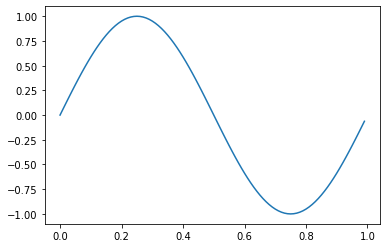

In [15]:
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    # get the x and y pixel coords
    x, y = event.x, event.y
    if event.inaxes:
        ax = event.inaxes  # the axes instance
        print('data coords %f %f' % (event.xdata, event.ydata))


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

In [13]:
%matplotlib inline